<a href="https://colab.research.google.com/github/Latamila/ConsumoEnergiaSerieTemporal/blob/main/ConsumoEnergia3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Interpretando o AIC(akaike information criterion)

O AIC (Akaike information criterion) é uma métrica comumnete usada para avaliar modelos estatisticos. No contexto do teste de Dickey-fuller aumentado, o AIC pode ser usado como um autolag para selecionar o melhor número de lags para incluir no modelo.

O teste de Dickey-fuller aumentado é um teste de raiz unitária que é utilizado para determinar se uma serie temporal é estacionária. O autolag permite que o modelo teste diferentes numeros de lags para identificar aquele que oferece o melhor ajuste aos dados. O AIC é então usado para avaliar os diferentes modelos e selecionar o que tem a menor pontuação de AIC.

#A menor pontuação de AIC indica que
 o momdelo é o mais preciso e eficiente entre as opções avaliadas. Portanto, usando o AIC como autolag no teste de dickey-fuller aumentado permite a seleção do melhor número de lags para incluir no modelo, resultando em uma avaliação mais precisa da estacionariedade da série temporal.



As transformações são usadas para estabilizar a variação não constante de uma série. Metodos de transformação comuns incluem transformação de log, raiz quadrada e transformação Box-Cox.

Essas são as principais tecnicas para aplicar estacionaridade:

* transformações

* transformação de log
* transformação exponencial
* transformação box cox
* transformação da raiz quadrada
* remoção de tendencia

#smoothing(alisamento ou suavização)

é usada para remover a tendencia da serie, calculando médias continuas ao longo das janelas de tempo.

mas as tecnicas acima não funcionam em todos os casos, principalmente nos de alta sazonalidade. Para esses casos, outras tecnicas podem ser usadas:

* diferenciação

Nesta tecnica calculamos a diferença da observação em um determinado instante com a do instante anterior.

* decomposição

Nesta abordagem (que vimos em aulas anteriores e voltaremos a estudar), a tendencia e a sazonalidade sao modeladas separadamente e a parte restante da serie é retornada.

Vamos estudando as tecnicas de forma intercambiavel, pois elas sao melhores usadas quando aplicadas em conjunto. Não sabemos qual tecnica vai apresentar o melhor resultado, pois isso sempre depende dos lados e precisamos experimentar e comparar. É o que faremos.

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.12


In [ ]:
!pip install -q -U watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.2 MB/s eta 0:00:00


In [ ]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns

# Imports para análise de dados
import scipy
from scipy.stats import boxcox

In [ ]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

seaborn   : 0.12.2
matplotlib: 3.7.1
numpy     : 1.23.5
scipy     : 1.11.4
pandas    : 1.5.3



In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
# Carrega os dados
# Observe que estamos carregando os dados e já definindo a data como índice com o parâmetro index_col = 0
dados = pd.read_csv('dataset.csv',
                    header = None,
                    index_col = 0,
                    names = ['consumo_energia'])

In [ ]:
dados.head()

,consumo_energia
2004-01,112
2004-02,118
2004-03,132
2004-04,129
2004-05,121


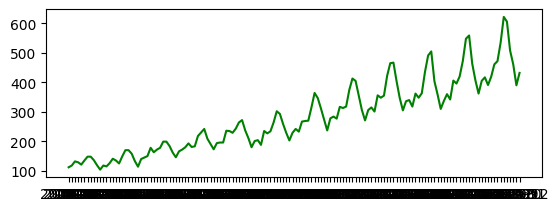

In [ ]:
# Área de plotagem
plt.figure(1)

# Gráfico de Linha
plt.subplot(211)
plt.plot(dados['consumo_energia'], color = "green")

(array([24., 27., 19., 18., 22., 13., 10.,  6.,  3.,  2.]),
 array([104. , 155.8, 207.6, 259.4, 311.2, 363. , 414.8, 466.6, 518.4,
        570.2, 622. ]),
 <BarContainer object of 10 artists>)

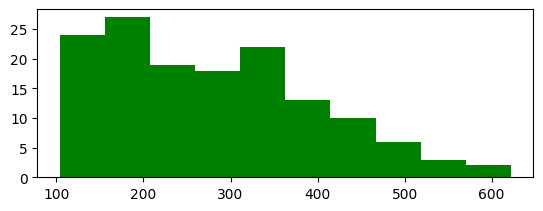

In [ ]:
# Histograma
plt.subplot(211)
plt.hist(dados['consumo_energia'], color = "green")

In [ ]:
# Média da série
dados['consumo_energia'].mean()

280.3125

In [ ]:
# Desvio Padrão da série
dados['consumo_energia'].std()

119.95368970909222

O conjunto de dados é **não estacionário**, o que significa que a média e a variância das observações mudam ao longo do tempo. Isso dificulta a modelagem por métodos estatísticos clássicos, como ARIMA, e métodos mais sofisticados de aprendizado de máquina, como redes neurais.

A não estacionaridade é causada pelo que parece ser uma tendência crescente e um componente de sazonalidade.

Além disso, a quantidade de alteração ou a variância está aumentando com o tempo. Isso fica claro quando você olha para o tamanho do componente sazonal e percebe que a amplitude (de baixo para cima) está aumentando.

#TRANSFORMAÇÃO DE LOG

series temporais podem ser linearizadas usando o logaritmo dos valores. Isso é chamado de transformação de log. Você com certeza lembra do que é logaritmo pois estudou isso no ensino fundamental.

As transformações de log são populares em dados de series temporais, pois são eficazes na remoção da variação exponencial.

É importante observar que esta operação assume que os valores são positivos e diferentes de zero. É comum transformar observações adicionando uma constante fixa para garantir que todos os valores de entrada atendam a esse requisito.Por exemplo: serie_transformada_y = log(constante + x).

In [ ]:
# Vamos aplicar uma transformação de log usando np.log() e gravamos o resultado em uma nova coluna do nosso dataset
dados['consumo_energia_log'] = np.log(dados['consumo_energia'])
dados.head()

,consumo_energia,consumo_energia_log
2004-01,112,4.718499
2004-02,118,4.770685
2004-03,132,4.882802
2004-04,129,4.859812
2004-05,121,4.795791


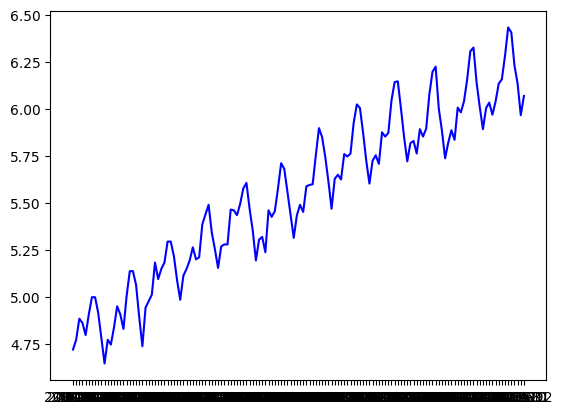

In [ ]:
# Plot da série transformada
plt.plot(dados['consumo_energia_log'], color = "blue")

(array([ 8., 14., 11., 20., 16., 15., 27., 17., 11.,  5.]),
 array([4.6443909 , 4.82324582, 5.00210074, 5.18095566, 5.35981058,
        5.5386655 , 5.71752042, 5.89637533, 6.07523025, 6.25408517,
        6.43294009]),
 <BarContainer object of 10 artists>)

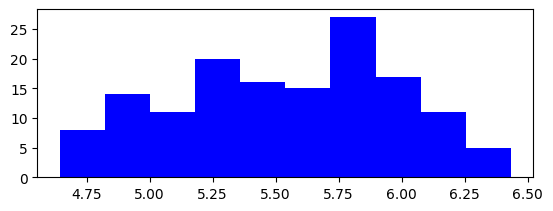

In [ ]:
# Histograma da série transformada
plt.subplot(211)
plt.hist(dados['consumo_energia_log'], color = "blue")

Análise:

-  A execução do exemplo resulta em uma tendência que parece mais linear. O gráfico de linha mostra um crescimento e variação aparentemente lineares.

- O histograma também mostra uma distribuição de observações do tipo gaussiana mais uniforme.

Vamos testar a estacionaridade.

In [ ]:
# Função
def testa_estacionaridade(serie):

    from statsmodels.tsa.stattools import adfuller

    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')

    # Plot
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()

    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)

    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

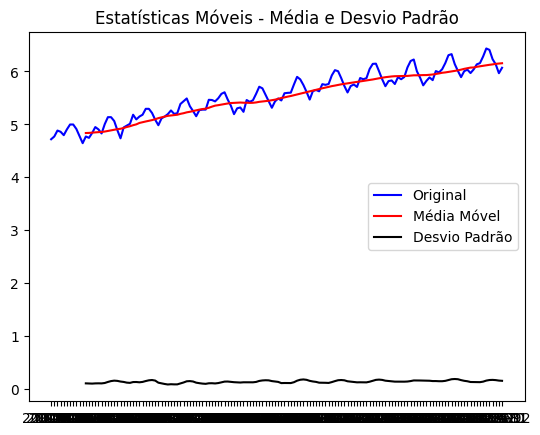


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -1.714743
Valor-p                           0.423533
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [ ]:
testa_estacionaridade(dados['consumo_energia_log'])


Análise:

- A Transformação de Log não converteu a série em estacionária.

## Transformação de Raiz Quadrada

Uma série temporal que tem uma tendência quadrática de crescimento pode ser linearizada calculando sua raiz quadrada.

É possível que nosso conjunto de dados mostre um crescimento quadrático. Se esse for o caso, poderíamos esperar que uma transformação de raiz quadrada, para reduzir a tendência de crescimento, seja linear e alterar a distribuição de observações para talvez ser quase gaussiana.

O exemplo abaixo executa uma raiz quadrada do conjunto de dados e plota os resultados.

---



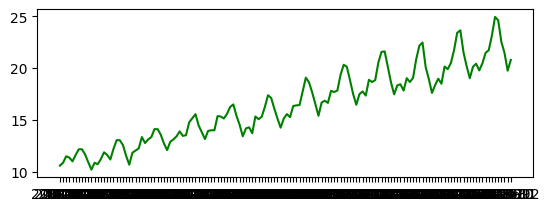

In [ ]:
# Transformação de Raiz Quadrada com np.sqrt()
dados_sqrt = np.sqrt(dados['consumo_energia'])

# Gráfico de Linha
plt.subplot(211)
plt.plot(dados_sqrt, color = "green")

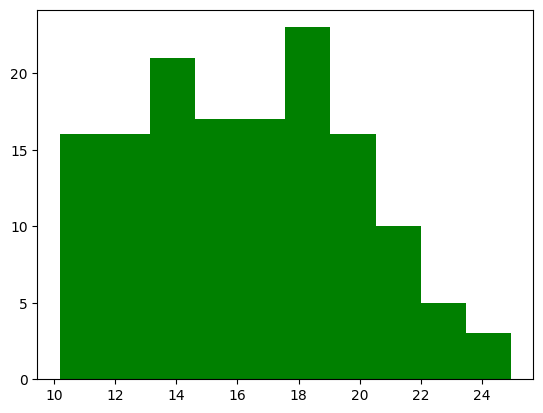

In [ ]:
# Histograma
plt.hist(dados_sqrt, color = "green")
plt.show()

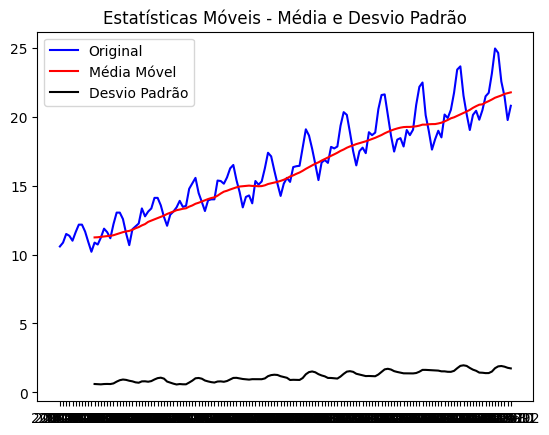


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -0.343797
Valor-p                           0.919068
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [ ]:
testa_estacionaridade(dados_sqrt)

Análise:

- Podemos ver que a tendência foi reduzida, mas não foi removida.

- O gráfico de linha ainda mostra uma variação crescente de ciclo para ciclo. E o histograma ainda mostra uma cauda longa à direita da distribuição, sugerindo uma distribuição exponencial ou de cauda longa.

## Transformação Box-Cox

A transformação de raiz quadrada e a transformação de log pertencem a uma classe de transformações denominadas transformações de potência.

A transformação Box-Cox é um método de transformação de dados configurável que suporta a raiz quadrada e a transformação de log, bem como um conjunto de transformações relacionadas.

#Mais do que isso, pode ser configurado para avaliar um conjunto de transformações automaticamente e selecionar o melhor ajuste.

A série resultante pode ser mais linear e a distribuição resultante mais gaussiana ou uniforme, dependendo do processo que a gerou.

A biblioteca scipy.stats fornece uma implementação da transformação Box-Cox. A função boxcox() usa um argumento, chamado lambda, que controla o tipo de transformação a ser executada.

Abaixo estão alguns valores comuns para lambda

- lambda = -1. é uma transformação recíproca.
- lambda = -0,5 é uma transformação de raiz quadrada recíproca.
- lambda = 0,0 é uma transformação de log.
- lambda = 0,5 é uma transformação de raiz quadrada.
- lambda = 1.0 não é transformação.

Vamos ao exemplo:

In [ ]:
# Aplicando Transformação Box-Cox
dados['consumo_energia_box'] = boxcox(dados['consumo_energia'], lmbda = 0.0)
dados.head()

,consumo_energia,consumo_energia_log,consumo_energia_box
2004-01,112,4.718499,4.718499
2004-02,118,4.770685,4.770685
2004-03,132,4.882802,4.882802
2004-04,129,4.859812,4.859812
2004-05,121,4.795791,4.795791


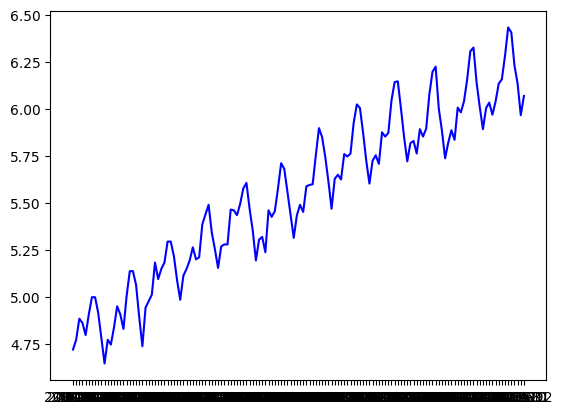

In [ ]:
# Plot da série transformada
plt.plot(dados['consumo_energia_box'], color = "blue")

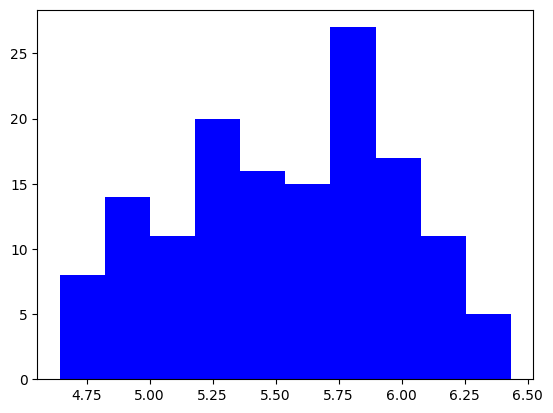

In [ ]:
# Histograma
plt.hist(dados['consumo_energia_box'], color = "blue")
plt.show()

Podemos definir o parâmetro lambda como None (o padrão) e deixar a função encontrar um valor ajustado estatisticamente.

O exemplo a seguir demonstra esse uso, retornando o conjunto de dados transformado e o valor lambda escolhido.

In [ ]:
# Aplicando Transformação Box-Cox
dados['consumo_energia_box_2'], lam_value = boxcox(dados['consumo_energia'])
print('Valor Ideal de Lambda: %f' % lam_value)
dados.head()

Valor Ideal de Lambda: 0.148174


,consumo_energia,consumo_energia_log,consumo_energia_box,consumo_energia_box_2
2004-01,112,4.718499,4.718499,6.830212
2004-02,118,4.770685,4.770685,6.935620
2004-03,132,4.882802,4.882802,7.164857
2004-04,129,4.859812,4.859812,7.117541
2004-05,121,4.795791,4.795791,6.986622


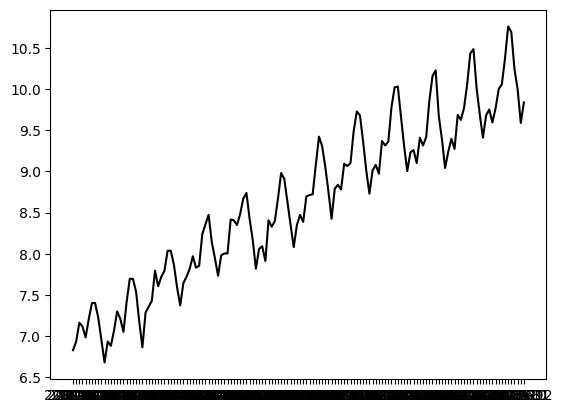

In [ ]:
# Plot da série transformada
plt.plot(dados['consumo_energia_box_2'], color = "black")

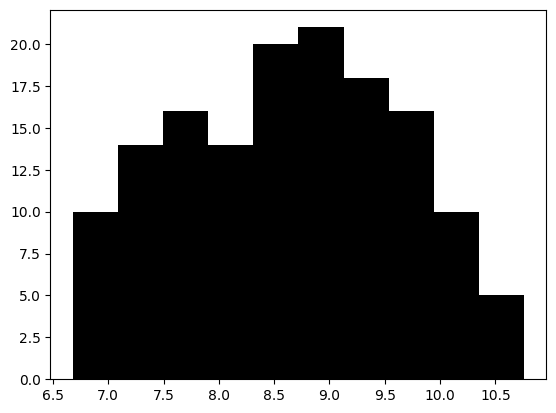

In [ ]:
# Histograma
plt.hist(dados['consumo_energia_box_2'], color = "black")
plt.show()

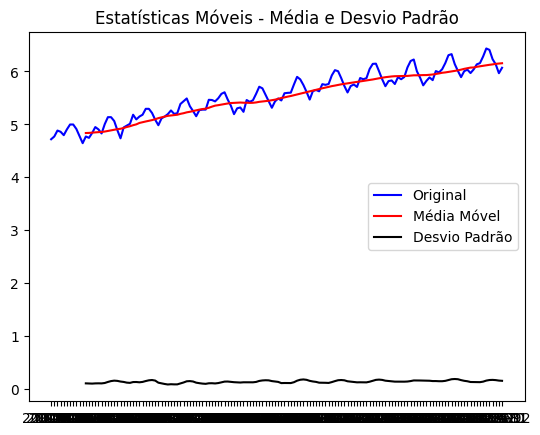


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -1.714743
Valor-p                           0.423533
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [ ]:
testa_estacionaridade(dados['consumo_energia_box'])

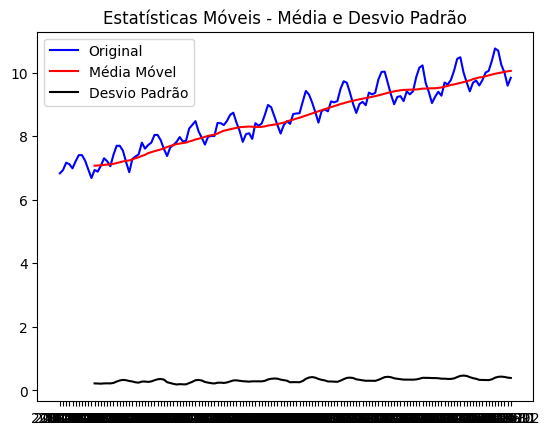


Resultado do Teste Dickey-Fuller:

Estatística do Teste             -1.323590
Valor-p                           0.618312
Número de Lags Consideradas      13.000000
Número de Observações Usadas    130.000000
Valor Crítico (1%)               -3.481682
Valor Crítico (5%)               -2.884042
Valor Crítico (10%)              -2.578770
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [ ]:
testa_estacionaridade(dados['consumo_energia_box_2'])

Análise:

- A execução do exemplo gerou o valor lambda de 0,148.

- Podemos ver que isso está muito próximo de um valor lambda de 0,0, resultando em uma transformação de log mais forte (e menor) que 0.5 para a transformação de raiz quadrada.

Aparentemente nenhuma das técnicas anteriores apresentou resultado para tornar a série estacionária. Mas temos ainda algumas cartas na manga, ou melhor, algumas outras técnicas.

# FIM DA PARTE 3
